## CPE 4903 - Cats and Dogs ##

## HW Part I - Import data ##
Produce the labeled data matrices X and Y by reading all 25000 images in the "train" folder. 
* You can download the photos folders from Kaggle: https://www.kaggle.com/c/dogs-vs-cats. 
* Download train.zip and unzip the 25000 files and move them to a folder and note the file path. For example, mine was
  C:\Users\haiho\Dropbox\_Professor\ECE\_fall 2020\CPE4903\Animals\train 
* You can use the functions provided in this notebook
* hint: You can use following loop command to loop through all the files: "for i,image_file in enumerate(images) :"
* Use train_test_split (with randomization) to split the data between train and test at 80/20. Be vigilant and verify the dimensions of X,Y throughout
* Display the resulting data matrices that should look like the following:
    - Shape of X_train is: (12288, 20000)
    - Shape of X_test is: (12288, 5000)
    - Shape of Y_train is: (1, 20000)
    - Shape of Y_test is: (1, 5000)
* Display the first 5 values of X_train and Y_train

In [1]:
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np 
import pandas as pd 
import time
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import tensorflow as tf
from PIL import Image

In [2]:
# Your Part I code here. Print the shapes of all X's and Y's
data = np.load(r'C:\Users\c3myb\OneDrive\Documents\Juypter Notebook HW Files\CPE 4903\Cat and Dog [Keras Edition]\cats_equal_1.npz')
#Cats = 1, Dogs = 0

In [3]:
data.files

['arr_0', 'arr_1', 'arr_2', 'arr_3']

## HW Part II - Manual Binary Classification Algorithm ##
Use the equations below, which was implemented in your previous assignment of classifying the unit circle to implement the cat/dog classification using the data generated in part I. 
<div>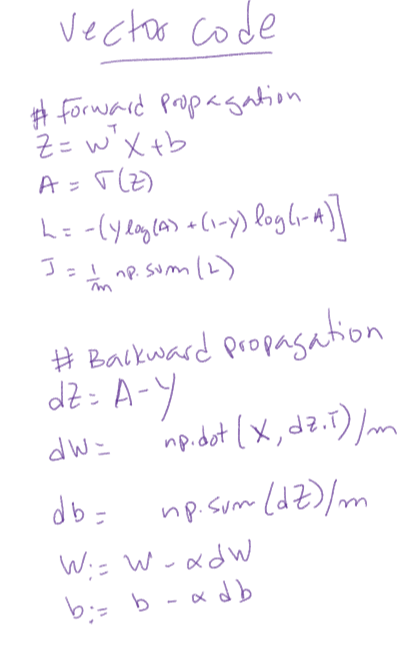<div>
    
Your successful run of the LoR algorithm on the images should show a converging cost function similar to shown below:
<div>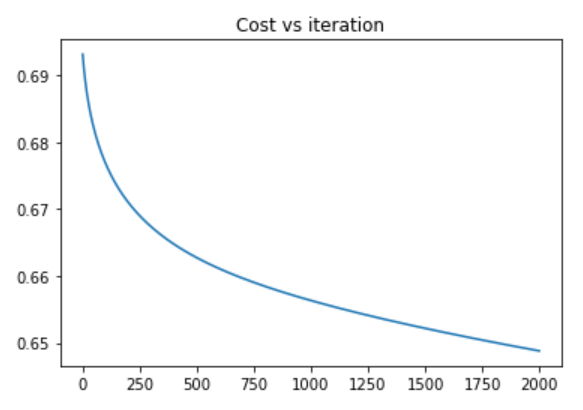<div>

Your train and test accuracy should be in the low 60%'s
* Plot your cost function
* Calculate and print your train and test accuracy (used command from previous assignment - circle)
* Show results of classifying a new downloaded image of cat or dog (maybe correct or incorrect, try several)


In [4]:
#alpha = 1

#nx = 12288
#m = 20000

X_train = data['arr_0'].T
X_test = data['arr_1'].T
Y_train = data['arr_2'].flatten()
Y_test = data['arr_3'].flatten()

Y_train = Y_train.flatten()
X_train2 = X_train.reshape(X_train.shape[0], 64, 64, 3)   #samples, w, h, channels
X_test2 = X_test.reshape(X_test.shape[0], 64, 64, 3)
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [5]:
print(Y_train.shape)

print(X_train2.shape)

(20000, 1)
(20000, 64, 64, 3)


In [6]:
nb_classes = 10 # number of classification outputs 0..9
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [7]:
epoch = 35
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv2D(16, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv2D(8, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(units = 200, activation = 'relu'))
model_cnn.add(Dense(units = 10, activation = 'sigmoid'))

model_cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model_cnn.summary())
history = model_cnn.fit(X_train2,Y_train,epochs=epoch,batch_size=250,validation_split=.2,verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 8)         1

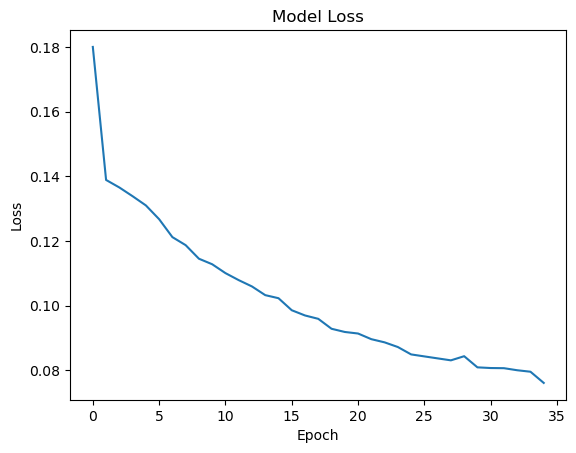

In [8]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [9]:
loss, accuracy = model_cnn.evaluate(X_test2, Y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

157/157 [==============================] - 1s 10ms/step - loss: 0.0808 - accuracy: 0.8186
Test loss: 0.08079717308282852
Test accuracy: 0.8185999989509583


In [16]:
# Load the image
image = Image.open(r'C:\Users\c3myb\OneDrive\Pictures\Folder\cat pic.jpg')

image.show()
# Preprocess the image
image = image.resize((64, 64))
image = np.array(image, dtype=np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make the prediction
predicted_probabilities = model_cnn.predict(image)
predicted_class = np.argmax(predicted_probabilities)


if predicted_class == 1:
    print ('This is a cat.')
else:
    print('This is a dog.')

This is a cat.


In [17]:
# Load the image
image = Image.open(r'C:\Users\c3myb\OneDrive\Pictures\Folder\cute-dog-headshot.jpg')

image.show()
# Preprocess the image
image = image.resize((64, 64))
image = np.array(image, dtype=np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Make the prediction
predicted_probabilities = model_cnn.predict(image)
predicted_class = np.argmax(predicted_probabilities)


if predicted_class == 1:
    print ('This is a cat.')
else:
    print('This is a dog.')

This is a dog.
